In [1]:
import tweepy, codecs


In [13]:
## fill in your Twitter credentials
# consumer_key = "your_consumer_key_from_twitter"
# consumer_secret = "your_consumer_secret_from_twitter"
# access_token = "your_access_token"
# access_token_secret = "your_access_token"

consumer_key = "********************"
consumer_secret = "**********************"
access_token = "******************************"
access_token_secret = "********************"

In [14]:
## let Tweepy set up an instance of the REST API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [15]:
import re
## fill in your search query and store your results in a variable
results = api.search_tweets(q = "trudeau", lang = "en", result_type = "recent", count = 4)

## use the codecs library to write the text of the Tweets to a .txt file
file = codecs.open("./trudeau_tweets.txt", "w", "utf-8")
for result in results:
    clean_tweets =  re.sub(r'[?|$|.|!|@|:|/|\|&|;|]',r'',result.text)
    print("clean_tweets:",clean_tweets)
    file.write(clean_tweets)
    file.write("\n")
file.close()

clean_tweets: RT dubsndoo In about ten days, Trudeau will halt Parliament and go on vacay for another month and a half he’s been back at work for a we…
clean_tweets: RT prairiecentrist That Justin Trudeau just gets more and more powerful every day httpstcotHR4nVBhHP
clean_tweets: RT NorthernObservr JFN1971 troyhof51462950 JustinTrudeau Undoubtedly 

Be aware the Trudeau Foundation 
And
Investigate “Clinton Cas…


In [16]:
import csv, io,urllib,http.client,json

count=0
with io.open('Trudeau_Tweets_polarized.csv', 'w', encoding='utf8', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["Tweet", "Sentiment"])
    
    with io.open("trudeau_tweets.txt", 'r', encoding='utf8') as f:
        for tweet in f.readlines():
    ## Remove extra spaces or newlines around the text
            
            tweet = tweet.strip()
            count += 1
            print("count:",count)
            
        ## Format tweet in the request pattern  
            tweet_tourl_string = urllib.request.pathname2url(tweet)
            full_url = "/analyze/?text=" + tweet_tourl_string
            conn = http.client.HTTPSConnection("twinword-sentiment-analysis.p.rapidapi.com")
           


            ## Reject tweets which are empty so you don’t waste your API credits
            if len(tweet) == 0:
                print('skipped')
                continue

            print("tweet", tweet)
            headers = {
                        'x-rapidapi-host': "twinword-sentiment-analysis.p.rapidapi.com",
                        'x-rapidapi-key': "460cfb3b13msh1e96bee64b6afeap1d1871jsn7f099b402a70"
                        }       
            conn.request("GET", full_url, headers=headers)
            res = conn.getresponse()
            respBody = res.read()
            sentiment = json.loads(respBody)
            print("Sentiment:", sentiment["type"])
            csv_writer.writerow([tweet, sentiment['type']])
            conn.close()

count: 1
tweet RT dubsndoo In about ten days, Trudeau will halt Parliament and go on vacay for another month and a half he’s been back at work for a we…
Sentiment: positive
count: 2
tweet RT prairiecentrist That Justin Trudeau just gets more and more powerful every day httpstcotHR4nVBhHP
Sentiment: positive
count: 3
tweet RT NorthernObservr JFN1971 troyhof51462950 JustinTrudeau Undoubtedly
Sentiment: positive
count: 4
skipped
count: 5
tweet Be aware the Trudeau Foundation
Sentiment: positive
count: 6
tweet And
Sentiment: neutral
count: 7
tweet Investigate “Clinton Cas…
Sentiment: neutral


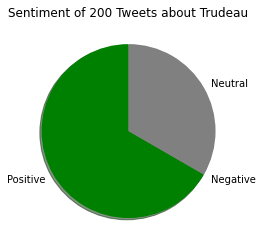

In [17]:

## import the libraries
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import csv

## open up your csv file with the sentiment results
with open('Trudeau_Tweets_polarized.csv', 'r', encoding = 'utf8') as csvfile:
## use Pandas to read the “Sentiment” column,
    df = pd.read_csv(csvfile)
    sent = df["Sentiment"]

## use Counter to count how many times each sentiment appears
## and save each as a variable
counter = Counter(sent)
positive = counter['positive']
negative = counter['negative']
neutral = counter['neutral']

## declare the variables for the pie chart, using the Counter variables for “sizes”
labels = 'Positive', 'Negative', 'Neutral'
sizes = [positive, negative, neutral]
colors = ['green', 'red', 'grey']
yourtext = "Trudeau"

## use matplotlib to plot the chart
plt.pie(sizes, labels = labels, colors = colors, shadow = True, startangle = 90)
plt.title("Sentiment of 200 Tweets about "+yourtext)
plt.show()